In [7]:
from IPython.display import clear_output, display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pathlib import Path
from sklearn.decomposition import PCA
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize
import warnings
from scipy.ndimage import gaussian_filter1d
import random
from wfOpto import *
warnings.filterwarnings("ignore")
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
#work
plt.style.use(r'C:\Users\nadia\Documents\GitHub\steinmetzlab\ALpres.mplstyle')

In [3]:
dataVis19 = wfOpto(Path(r'Y:\Subjects\AL_0035\2025-01-19\1'))

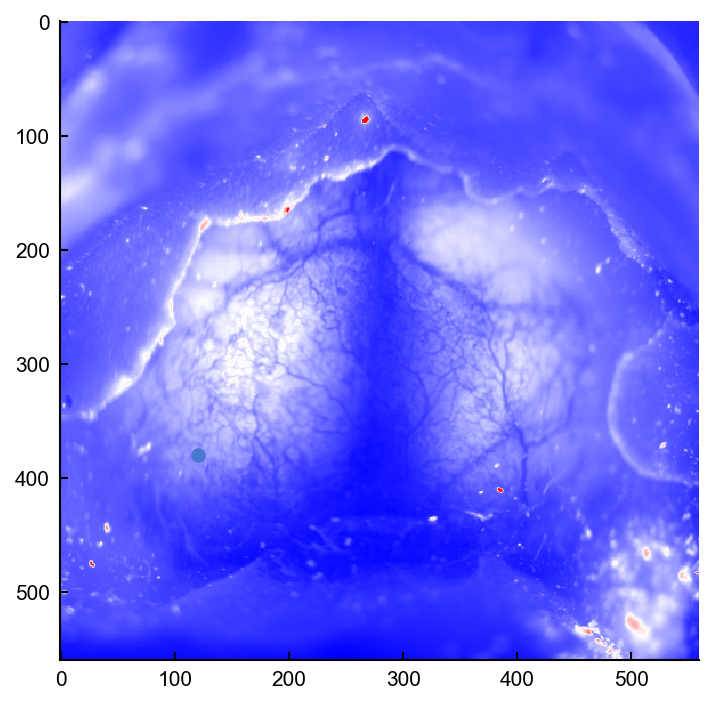

In [185]:
plt.imshow(dataVis19.meanImage, cmap='bwr')
plt.scatter(x=120,y=380)

if one takes the mean as the baseline of a trial, the (mean-baseline)/(mean) should by definition go to zero 

make sure this is the case with one trial

[-0.13543545 -0.04625865 -0.07346206 -0.09726234  0.03052702  0.11236811
  0.20952335  0.39339784  0.31095795  0.09398149]


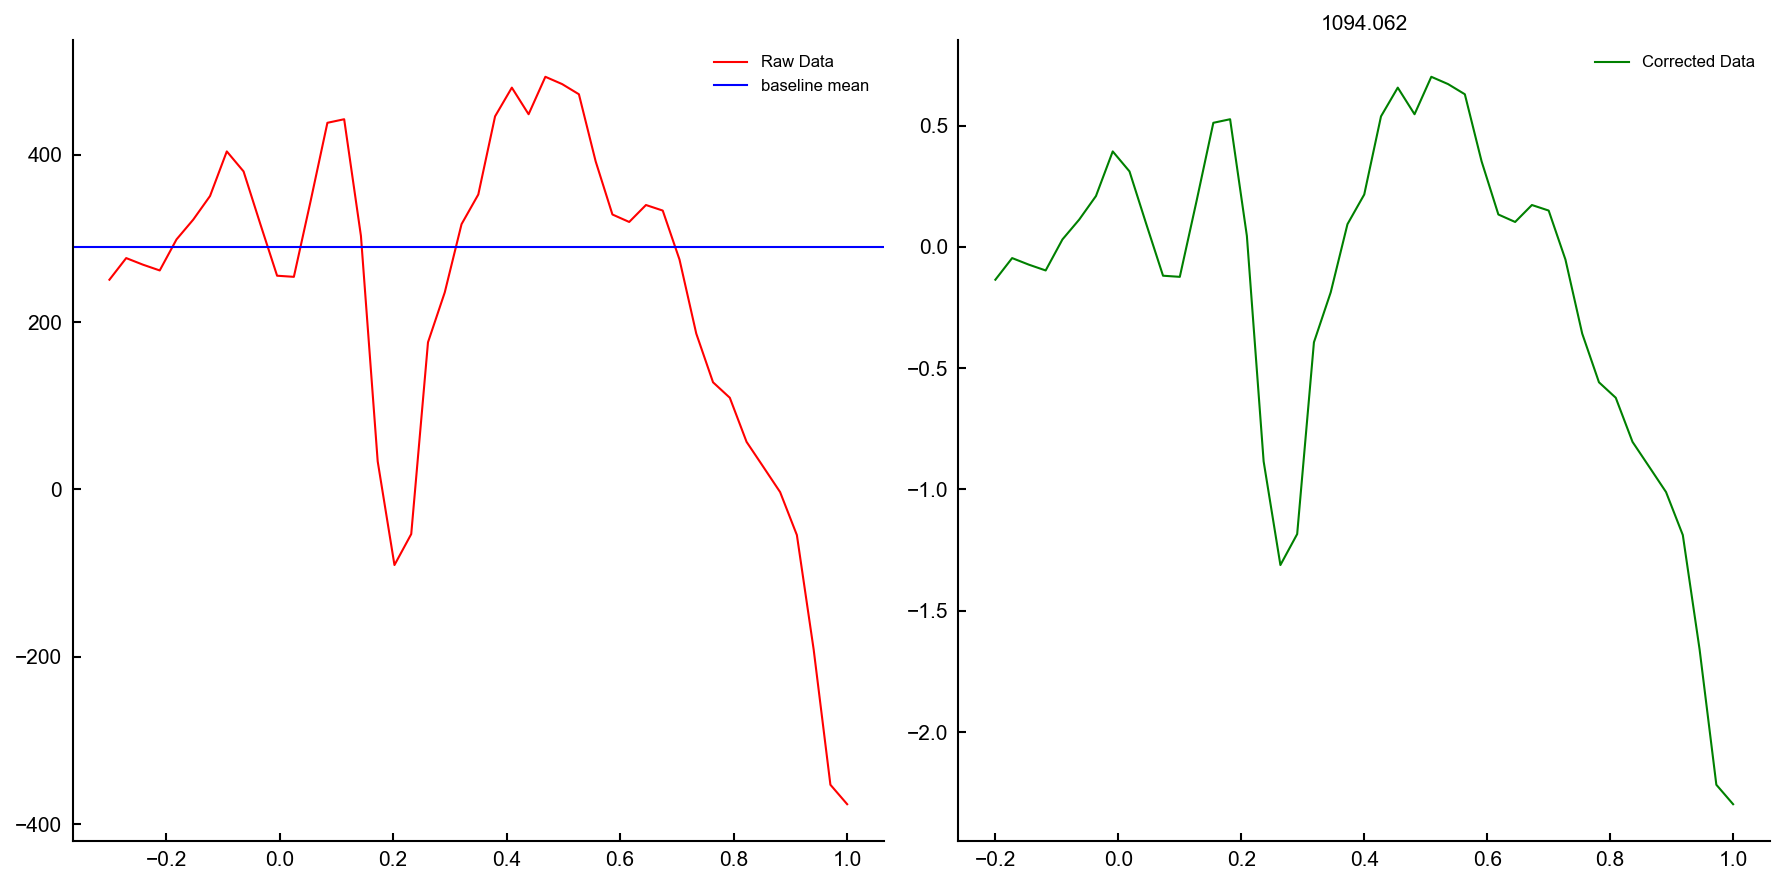

In [191]:
trial = dataVis19.laserOn[random.randint(0, len(dataVis19.laserOn)-1)] #find the starting time of some random trial
time = np.linspace(-.2+trial, 1+trial, 45) #get the timestamps for that trial from -.2:1s with 45 samples
temporal_components = dataVis19.tToWFManual(time) #get the temporal components for that trial
pixel_ix = np.ravel_multi_index((380,120), (dataVis19.py, dataVis19.px))
spatial_components = dataVis19.svdSpat[pixel_ix] #get the spatial components for a pixel in the visual cortex
neural_activity = spatial_components @ temporal_components.T #get the neural activity for that trial

#find the mean during the baseline period
baseline_mean = np.mean(neural_activity[0:7]) #7 samples bc 0.2s*35hz/s=10 samples

#df/f
neural_activity_corrected = (neural_activity - baseline_mean) / baseline_mean

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.plot(np.linspace(-.3,1,45),neural_activity,label='Raw Data',color='r')
ax1.axhline(baseline_mean, color='b',label='baseline mean')
ax1.legend()
ax2.plot(np.linspace(-.2,1,45),neural_activity_corrected,label='Corrected Data',color='g')
ax2.set_title(trial)
print(neural_activity_corrected[0:10])
ax2.legend()

with multiple trial averaged, but still one pixel

In [220]:
adaptation_trial_times=dataVis19.laserOn[int(len(dataVis19.laserOn)/2):]
sampled_rows = np.random.choice(len(adaptation_trial_times), 100, replace=False)
sampled_adaptation_trials = adaptation_trial_times[sampled_rows]

corrected=[]
raw=[]
for tr in sampled_adaptation_trials:
    time = np.linspace(-.2+tr, 1+tr, 45) #get the timestamps for that trial from -.2:1s with 45 samples
    temporal_components = dataVis19.tToWFManual(time) #get the temporal components for that trial
    spatial_components = dataVis19.svdSpat[pixel_ix] #get the spatial components for a pixel in the visual cortex
    neural_activity = spatial_components @ temporal_components.T #get the neural activity for that trial

    baseline_mean = np.mean(neural_activity[0:7]) #7 samples bc 0.2s*35hz/s=10 samples
    neural_activity_corrected = (neural_activity - baseline_mean) / baseline_mean

    raw.append(neural_activity)
    corrected.append(neural_activity_corrected)
corrected=np.array(corrected)
raw=np.array(raw)
    

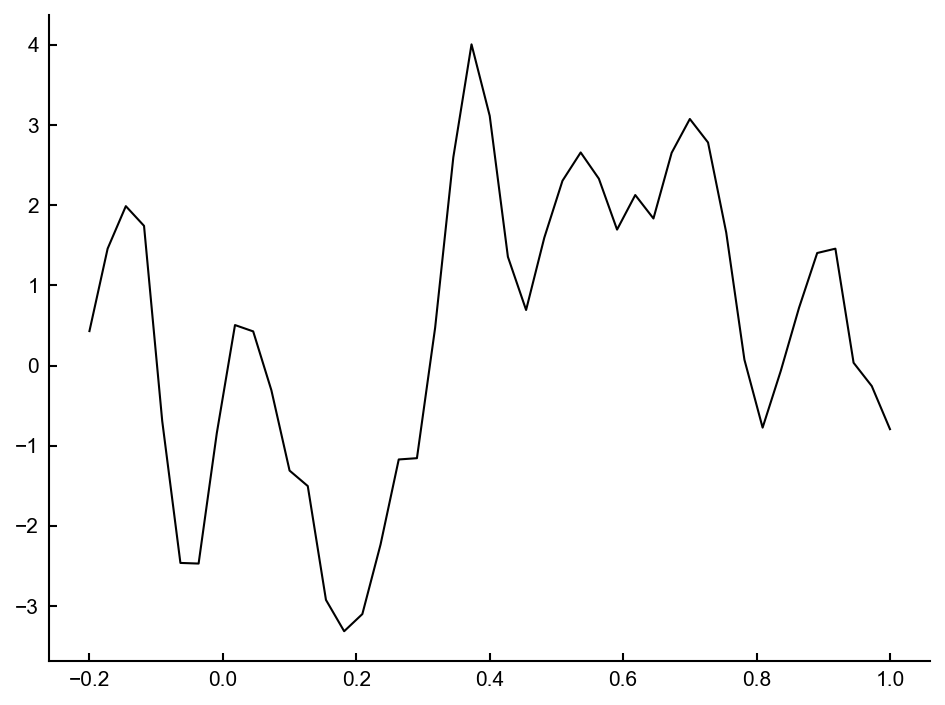

In [229]:
plt.plot(np.linspace(-.2,1,45),np.mean(corrected,axis=0),color='k')
plt.show()